In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trade_data
from passivbot import load_settings
from backtester import *

In [3]:
plt.rcParams['figure.figsize'] = [21, 13]
pd.set_option('precision', 10)

In [5]:
settings = load_settings('default')
settings

{'quot': 'BTC',
 'coins_long': ['ADA',
  'ATOM',
  'BAT',
  'BCH',
  'BNB',
  'DASH',
  'EOS',
  'ETC',
  'ETH',
  'IOST',
  'IOTA',
  'LINK',
  'LTC',
  'MATIC',
  'NEO',
  'ONT',
  'QTUM',
  'RVN',
  'TRX',
  'VET',
  'XLM',
  'XMR',
  'XRP',
  'XTZ',
  'ZEC'],
 'coins_shrt': ['ADA',
  'ATOM',
  'BAT',
  'BCH',
  'DASH',
  'EOS',
  'ETC',
  'ETH',
  'IOST',
  'IOTA',
  'LINK',
  'LTC',
  'MATIC',
  'NEO',
  'ONT',
  'QTUM',
  'RVN',
  'TRX',
  'VET',
  'XLM',
  'XMR',
  'XRP',
  'XTZ',
  'ZEC'],
 'do_not_borrow': ['BNB'],
 'profit_pct': 0.0025,
 'account_equity_pct_per_trade': 0.0006,
 'account_equity_pct_per_hour': 0.0045,
 'hours_rolling_small_trade_window': 1.0,
 'bnb_buffer': 50.3,
 'max_memory_span_days': 60,
 'snapshot_timestamp_millis': 0,
 'ema_spans_minutes': [15, 25, 40, 64, 102, 164, 263, 421, 675, 1080],
 'user': 'default'}

In [32]:
fee = 1 - 0.0675 * 0.01 # vip1


# modify settings here


#settings['profit_pct'] = 0.0025

#settings['account_equity_pct_per_trade'] = 0.0006

#settings['account_equity_pct_per_hour'] = 0.0045

settings['max_memory_span_days'] = 30

#settings['ema_spans_minutes'] = [15, 25, 40, 64, 102, 164, 263, 421, 675, 1080]

In [7]:
symbols = [f'{c}/BTC' for c in settings['coins_long']]
symbols = sorted(symbols)
n_days = 150
# remove VET RVN and IOST because in live trading these have low volume and have low price resolution
symbols = [s for s in symbols if not any(s.startswith(c) for c in ['VET', 'RVN', 'IOST'])]
symbols

['ADA/BTC',
 'ATOM/BTC',
 'BAT/BTC',
 'BCH/BTC',
 'BNB/BTC',
 'DASH/BTC',
 'EOS/BTC',
 'ETC/BTC',
 'ETH/BTC',
 'IOTA/BTC',
 'LINK/BTC',
 'LTC/BTC',
 'MATIC/BTC',
 'NEO/BTC',
 'ONT/BTC',
 'QTUM/BTC',
 'TRX/BTC',
 'XLM/BTC',
 'XMR/BTC',
 'XRP/BTC',
 'XTZ/BTC',
 'ZEC/BTC']

In [8]:
# set no_download to True to load faster if already downloaded ohlcvs
high_low_means = load_hlms(symbols, n_days, no_download=False)

fetched 1m ohlcvs for ADA/BTC 2020-06-29T19:26:00
fetched 1m ohlcvs for ADA/BTC 2020-06-27T14:50:00
fetched 1m ohlcvs for ADA/BTC 2020-04-24T13:50:00
fetched 1m ohlcvs for ADA/BTC 2020-03-03T19:50:00
fetched 1m ohlcvs for ADA/BTC 2020-02-19T01:50:00
fetched 1m ohlcvs for ADA/BTC 2020-02-08T11:20:00
fetched 1m ohlcvs for ADA/BTC 2020-01-31T08:20:00
2020-06-30T12:05:30  2020-01.csv already present, merging... 
2020-06-30T12:05:31  2020-02.csv already present, merging... 
2020-06-30T12:05:32  2020-03.csv already present, merging... 
2020-06-30T12:05:33  2020-04.csv already present, merging... 
2020-06-30T12:05:34  2020-06.csv already present, merging... 
fetched 1m ohlcvs for ATOM/BTC 2020-06-29T19:26:00
fetched 1m ohlcvs for ATOM/BTC 2020-06-27T14:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-04-24T13:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-03-03T19:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-02-19T01:50:00
fetched 1m ohlcvs for ATOM/BTC 2020-02-08T11:20:00
fetched 1m ohlcvs for ATOM/BTC 202

fetched 1m ohlcvs for MATIC/BTC 2020-02-08T11:20:00
fetched 1m ohlcvs for MATIC/BTC 2020-01-31T08:20:00
2020-06-30T12:07:19  2020-01.csv already present, merging... 
2020-06-30T12:07:20  2020-02.csv already present, merging... 
2020-06-30T12:07:21  2020-03.csv already present, merging... 
2020-06-30T12:07:22  2020-04.csv already present, merging... 
2020-06-30T12:07:22  2020-06.csv already present, merging... 
fetched 1m ohlcvs for NEO/BTC 2020-06-29T19:28:00
fetched 1m ohlcvs for NEO/BTC 2020-06-27T14:50:00
fetched 1m ohlcvs for NEO/BTC 2020-04-24T13:50:00
fetched 1m ohlcvs for NEO/BTC 2020-03-03T19:50:00
fetched 1m ohlcvs for NEO/BTC 2020-02-19T01:50:00
fetched 1m ohlcvs for NEO/BTC 2020-02-08T11:20:00
fetched 1m ohlcvs for NEO/BTC 2020-01-31T08:20:00
2020-06-30T12:07:28  2020-01.csv already present, merging... 
2020-06-30T12:07:28  2020-02.csv already present, merging... 
2020-06-30T12:07:30  2020-03.csv already present, merging... 
2020-06-30T12:07:32  2020-04.csv already present, 

In [9]:
df = add_emas(high_low_means, settings['ema_spans_minutes'])

In [33]:
balance_list, lentr, sentr, lexit, sexit, lexitpl, sexitpl = backtest(df, settings)

100.00% acc equity quot: 2.123231  

In [34]:
# balances are in terms of quot
bldf = pd.DataFrame(balance_list).set_index('timestamp')

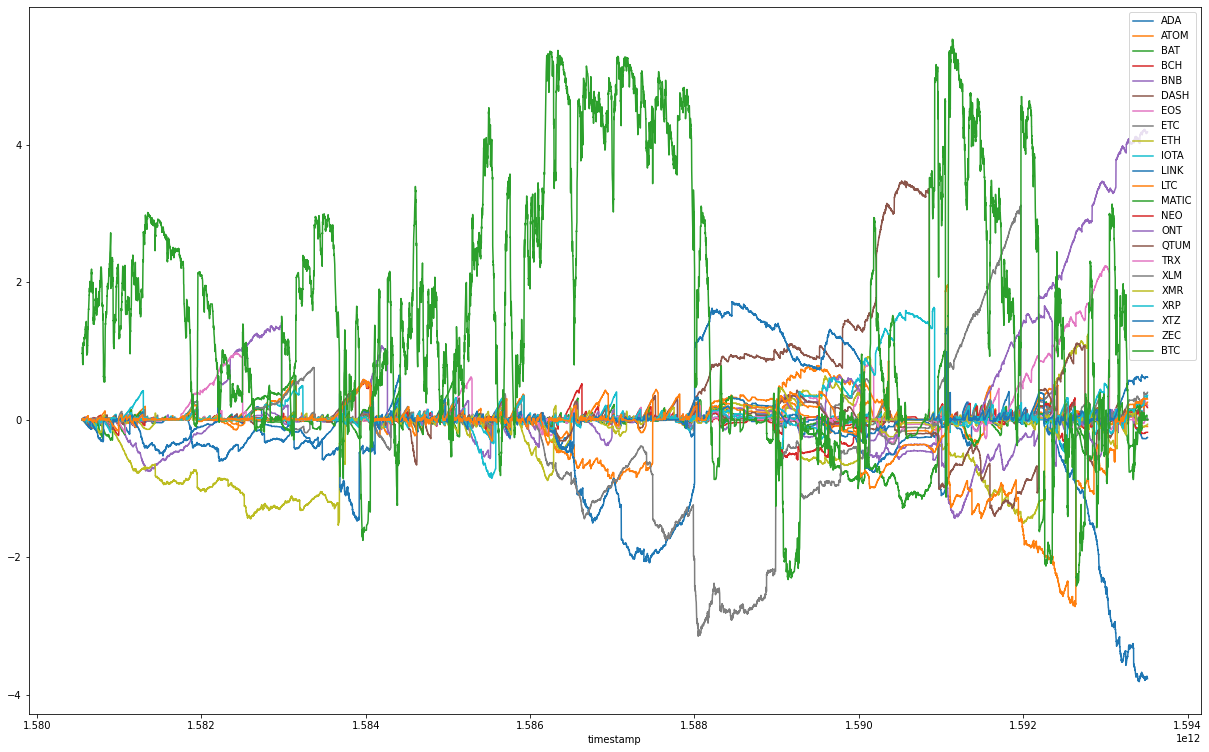

In [35]:
bldf.drop(['acc_equity_quot', 'acc_debt_quot'], axis=1).iloc[::10].plot()

average daily gain 1.00503263


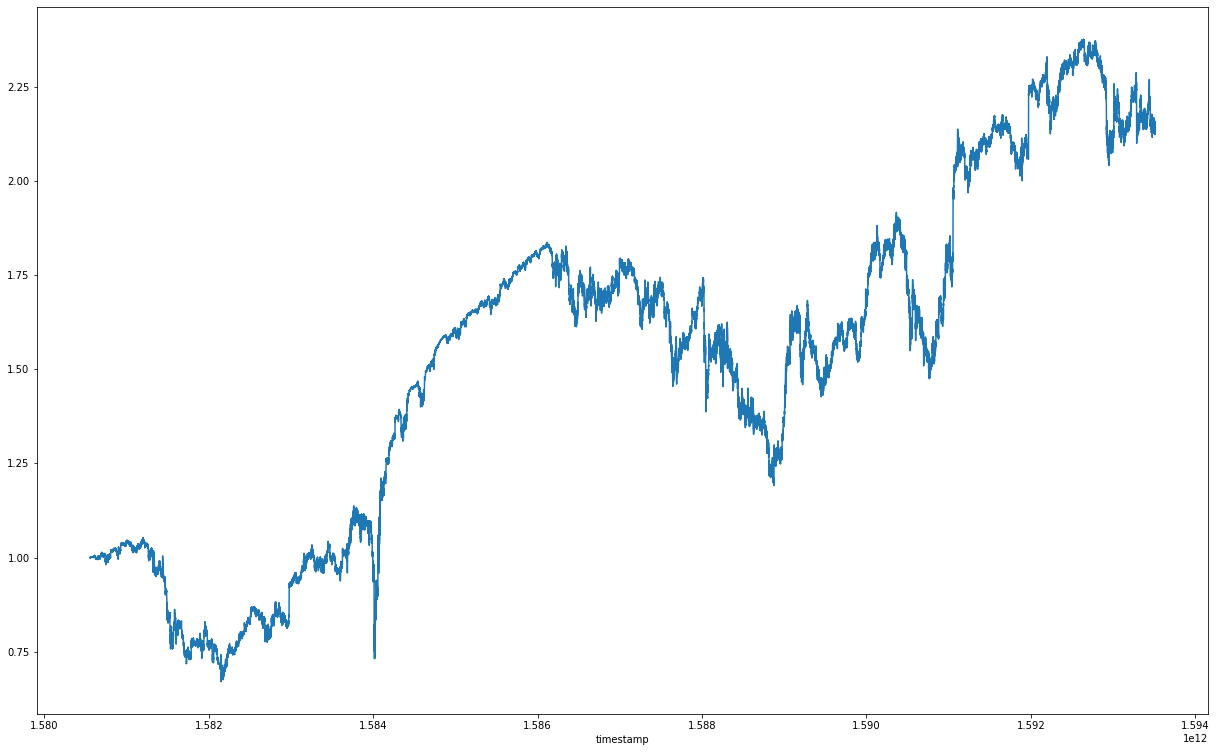

In [36]:
start_equity = bldf.acc_equity_quot.iloc[0]
end_equity = bldf.acc_equity_quot.iloc[-1]
n_days = (bldf.index[-1] - bldf.index[0]) / 1000 / 60 / 60 / 24
avg_daily_gain = (end_equity / start_equity)**(1 / n_days)
print('average daily gain', round(avg_daily_gain, 8))
bldf.acc_equity_quot.plot()

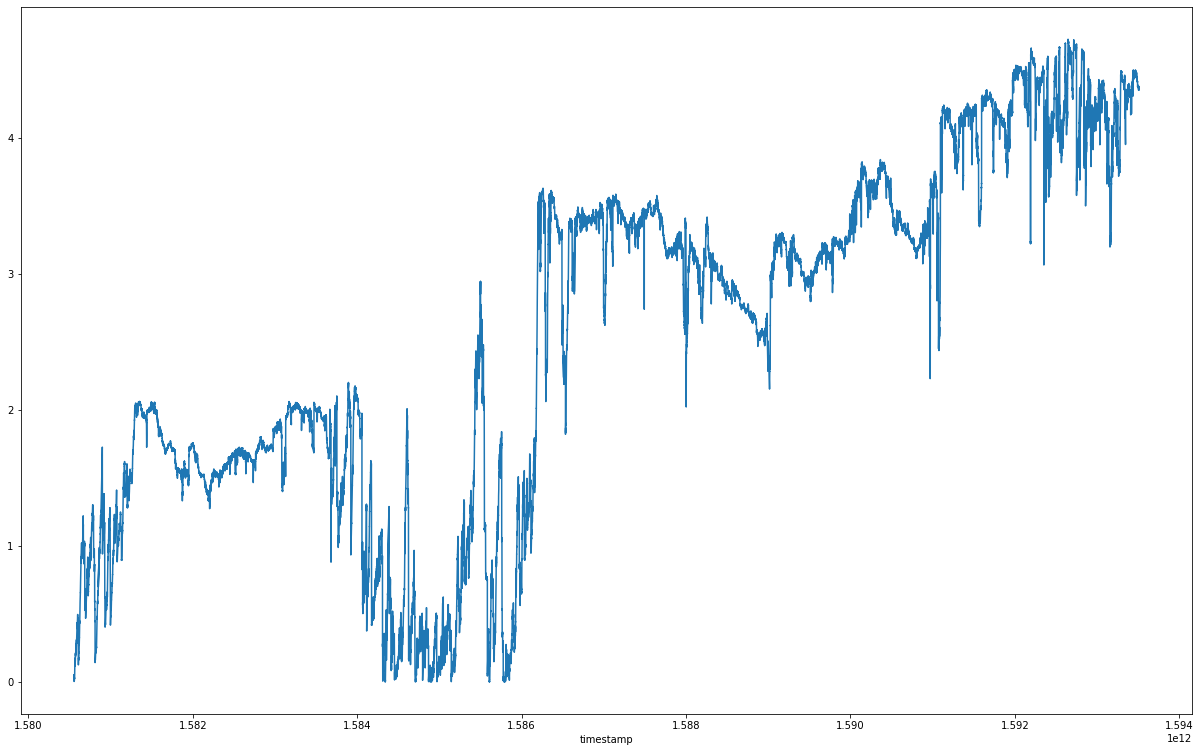

In [37]:
bldf.acc_debt_quot.plot()

In [38]:
sum_vol = 0.0
for s in symbols:
    s_ = s.replace('/', '_')
    vol = sum([e['price'] * e['amount'] for e in lentr[s_]])
    vol += sum([e['price'] * e['amount'] for e in sentr[s_]])
    vol += sum([e['price'] * e['amount'] for e in lexit[s_]])
    vol += sum([e['price'] * e['amount'] for e in sexit[s_]])
    sum_vol += vol
    print(s, vol)
print('approx monthly vol', sum_vol / n_days * 30)

ADA/BTC 59.91596012932421
ATOM/BTC 47.82268989698102
BAT/BTC 49.521571424271876
BCH/BTC 45.42339064998938
BNB/BTC 47.26772337286029
DASH/BTC 51.91066921430206
EOS/BTC 47.66940650179215
ETC/BTC 47.513133986787906
ETH/BTC 46.1508737581874
IOTA/BTC 46.872561965130195
LINK/BTC 50.25727339230882
LTC/BTC 43.413450124453135
MATIC/BTC 103.05940547900937
NEO/BTC 44.58267792547595
ONT/BTC 48.60777414755654
QTUM/BTC 43.14363265235337
TRX/BTC 152.4401831276345
XLM/BTC 54.396733999660654
XMR/BTC 44.442821882879315
XRP/BTC 52.66049640770518
XTZ/BTC 46.77208282007744
ZEC/BTC 45.51357377605707
approx monthly vol 243.87613355165493


In [39]:
# bag status at end
sorted([(round(e[1], 6), e[0]) for e in dict(bldf.iloc[-1]).items() if 'acc' not in e[0]])

[(-3.765511, 'LINK'),
 (-0.260146, 'ADA'),
 (-0.184055, 'NEO'),
 (-0.099369, 'ATOM'),
 (-0.066573, 'XMR'),
 (0.0, 'BAT'),
 (0.0, 'BTC'),
 (0.0, 'DASH'),
 (0.0, 'ETH'),
 (0.0, 'IOTA'),
 (0.0, 'QTUM'),
 (0.0, 'TRX'),
 (0.0, 'XLM'),
 (0.00128, 'MATIC'),
 (0.00861, 'ONT'),
 (0.175769, 'BCH'),
 (0.208396, 'EOS'),
 (0.253515, 'LTC'),
 (0.301697, 'ZEC'),
 (0.354959, 'XRP'),
 (0.396572, 'ETC'),
 (0.614642, 'XTZ'),
 (4.183444, 'BNB')]

In [40]:
# analyze particular symbol
s = 'DASH_BTC'

In [41]:
ledf = pd.DataFrame(lentr[s]).set_index('timestamp')
sedf = pd.DataFrame(sentr[s]).set_index('timestamp')
lexitdf = pd.DataFrame(lexit[s]).set_index('timestamp')
sexitdf = pd.DataFrame(sexit[s]).set_index('timestamp')
lexitpdf = pd.DataFrame(lexitpl[s]).set_index('timestamp')
sexitpdf = pd.DataFrame(sexitpl[s]).set_index('timestamp')

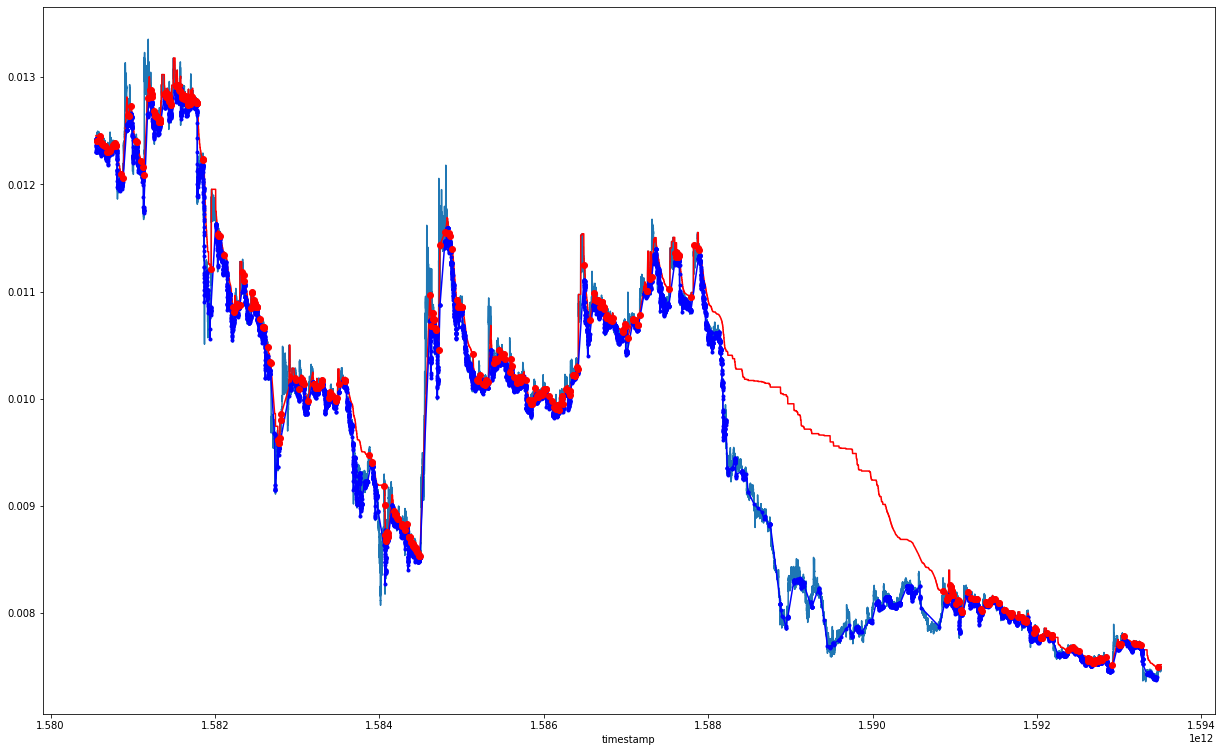

In [42]:
high_low_means[s + '_mean'].plot()
lexitpdf.price.plot(style='r-')
ledf.price.plot(style='b.-')
lexitdf.price.plot(style='ro')

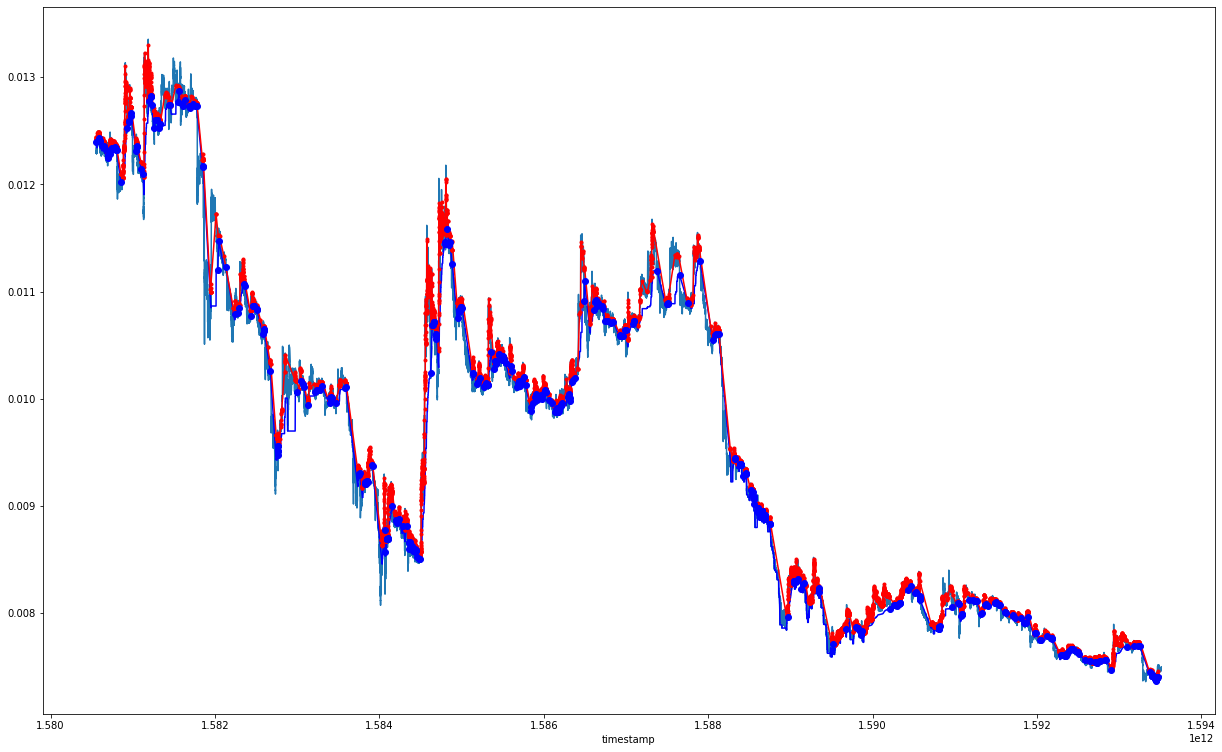

In [43]:
high_low_means[s + '_mean'].plot()
sexitpdf.price.plot(style='b-')
sedf.price.plot(style='r.-')
sexitdf.price.plot(style='bo')

In [44]:
# all buys
abdf = pd.DataFrame(sorted(lentr[s] + sexit[s], key=lambda x: x['timestamp'])).set_index('timestamp')

# all sels
asdf = pd.DataFrame(sorted(sentr[s] + lexit[s], key=lambda x: x['timestamp'])).set_index('timestamp')

In [45]:
buy_cost = (abdf.price * abdf.amount).sum()
sel_cost = (asdf.price * asdf.amount).sum()
sum_cost = buy_cost + sel_cost
buy_vwap = buy_cost / abdf.amount.sum()
sel_vwap = sel_cost / asdf.amount.sum()
diff = (sel_vwap / buy_vwap) * fee**2
print(f'buy vol: {buy_cost:.4f}')
print(f'sel vol: {sel_cost:.4f}')
print(f'sum vol: {sum_cost:.4f}')
print(f'buy vwap: {buy_vwap:.10f}')
print(f'sel vwap: {sel_vwap:.10f}')
print(f'diff: {(sel_vwap / buy_vwap)}')
print(f'approx profit: {buy_cost * (diff * fee**2 - 1)}')

buy vol: 25.9940
sel vol: 25.9167
sum vol: 51.9107
buy vwap: 0.0091636870
sel vwap: 0.0091426226
diff: 0.9977013196126308
approx profit: -0.1297033189404972
